# Zadanie

Napisz algorytm k-mean w wersji Lloyd (klasyczny). Nie można używać żadnych funkcji z k-means w pythonie. 

  * wszysko piszemy ręcznie
  * uzupełnij implementację poniższej klasy

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import random

class kmeans(object):

    def __init__(self):

        self.labels = None
        self.clusters = None
        self.n_clusters = None
        self.cluster_centers = None

    def fit(self, X, n_clusters):
        self.n_clusters = n_clusters
        self.labels = [i for i in range(n_clusters)]
        self.cluster_centers = X[np.random.permutation(X.shape[0])[:self.n_clusters]]
        old_clusters_centers = X[np.random.permutation(X.shape[0])[:self.n_clusters]]

        while not self.stop(self.cluster_centers, old_clusters_centers):
            old_clusters_centers = self.cluster_centers
            self.cluster_points(X)
            self.change_centers()

    def stop(self, new_centers, old_centers):
        return set([tuple(a) for a in new_centers]) == set([tuple(a) for a in old_centers])

    def predict(self, X):
        result = []
        for x in X:
            result.append(self.predict_point(x))
        return result
    
    def predict_point(self, x):
        return min([(i[0], np.linalg.norm(x-self.cluster_centers[i[0]])) for i in enumerate(self.cluster_centers)], key=lambda t:t[1])[0]

    def cluster_points(self, X):
        self.clusters = {}
        for x in X:
            best_key = min([(i[0], np.linalg.norm(x - self.cluster_centers[i[0]])) for i in enumerate(self.cluster_centers)], key=lambda t: t[1])[0]
            try:
                self.clusters[best_key].append(x)
            except KeyError:
                self.clusters[best_key] = [x]

    def change_centers(self):
        keys = sorted(self.clusters.keys())
        self.cluster_centers = []
        for k in keys:
            self.cluster_centers.append(np.mean(self.clusters[k], axis=0))


# Zadanie

Sprawdż działanie napisanego algorytmu na poniższych danych.

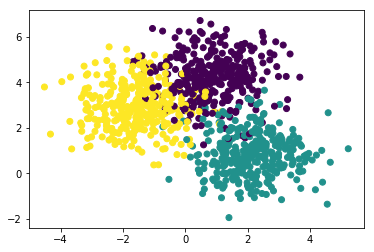

In [9]:
from sklearn.datasets.samples_generator import make_blobs
X_blobs, y_blobs = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0)
n_classes = len(set(y_blobs))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs)
plt.show()

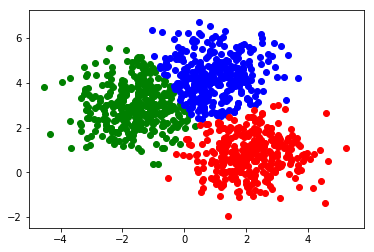

In [25]:
def plot_kmeans(k_means, colors=['red','blue','green']):
    for k,v in k_means.clusters.items():
        data = np.array(v)
        plt.scatter(data[:, 0], data[:, 1], c=colors[k])

km = kmeans()
km.fit(X_blobs, 3)
plot_kmeans(km)
plt.show()

# Zadanie

Wykonaj algorytm k-means (własny) na zbiorze iris (dwie wybrane współrzędne). 
 

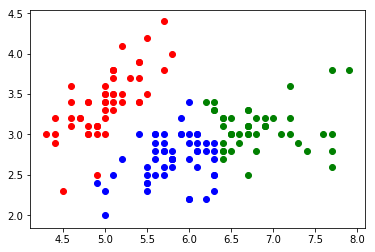

In [17]:
from sklearn.datasets import load_iris

iris = load_iris()
k_iris = kmeans()
k_iris.fit(iris.data[:,0:2], 3)
plot_kmeans(k_iris)
plt.show()

# Zadanie 
Predykcji można dokonać dla dowolnego punktu na płaszczyźnie. Wygeneruj punkty równomiernie na kwadracie zawierającym punkty i wykonaj dla nich predykcję.


Oryginalny zbiór danych niech będzie pokolorowany za pomocą oryginalnych klas. Narysuj wszystko na jednym wykresie.

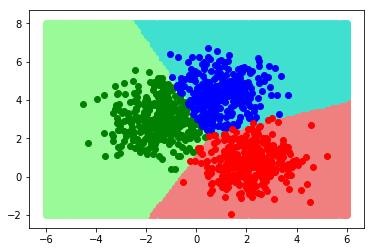

In [26]:
data = np.column_stack((np.random.uniform(-4, 4, 1000), np.random.uniform(-2, 6, 1000)))
colors = ['red','blue','green']
mesh_colors = ['lightcoral','turquoise', 'palegreen']
plot = [[],[],[]]
for x in np.linspace(-6,6,100):
    for y in np.linspace(-2,8, 100):
        class_ = km.predict_point((x,y))
        plot[class_].append([x,y])

for i,d in enumerate(plot):
    d = np.array(d)
    plt.scatter(d[:, 0], d[:, 1], c=mesh_colors[i])
    
for k,v in km.clusters.items():
    data = np.array(v)
    plt.scatter(data[:, 0], data[:, 1], c=colors[k])

plt.show()